In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

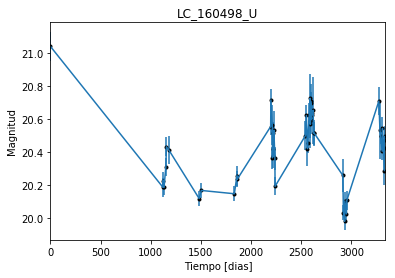

In [4]:
data = np.genfromtxt('LC_160498_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_160498_U')
plt.savefig("LC_160498_U.pdf")

In [5]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

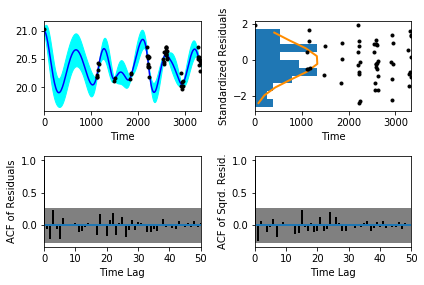

In [7]:
sample.assess_fit()

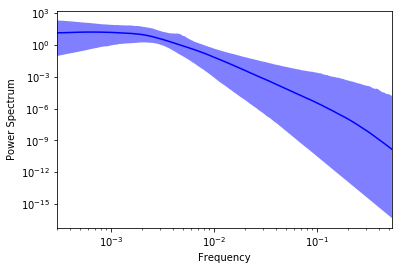

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

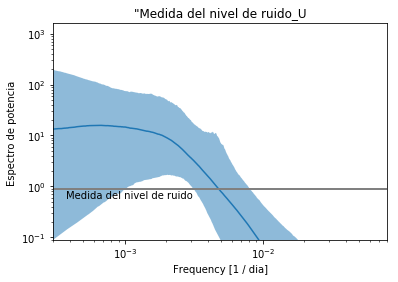

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_160498_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_160498_U')

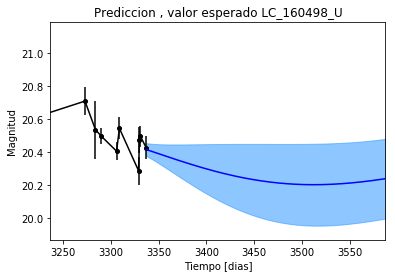

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_160498_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_160498_U')

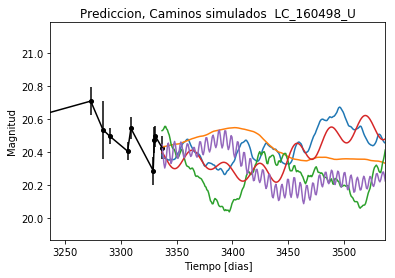

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_160498_U')

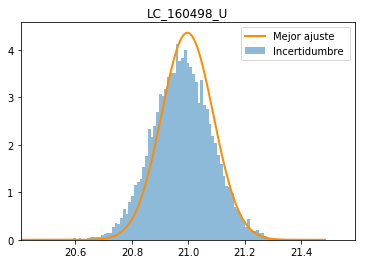

In [15]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_160498_U')
plt.savefig("Mejor_ajuste_LC_160498_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_160498_U')

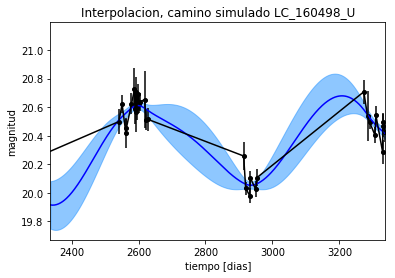

In [19]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_U')

Text(0.5,1,'Interpolacion, camino simulado LC_160498_U')

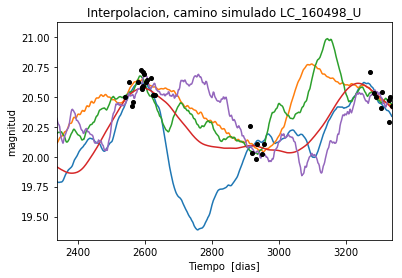

In [20]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_U')

In [21]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [22]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 539.497272498
Median: 0.00526753384659
Standard deviation: 0.176233018907
68% credibility interval: [ 0.00062694  0.12093476]
95% credibility interval: [  3.35120612e-04   7.25735761e-01]
99% credibility interval: [  3.06695849e-04   9.54796991e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1347.61064963
Median: 0.00203237949206
Standard deviation: 0.0825869959493
68% credibility interval: [ 0.00050199  0.02481141]
95% credibility interval: [ 0.00032664  0.26863019]
99% credibility interval: [  3.04582821e-04   6.10233391e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 2405.77880237
Median: 0.00729339062869
Standar

In [23]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1510.90846644
Median: 55.4930250011
Standard deviation: 1.67727844468
68% credibility interval: [ 53.6170658   56.75529823]
95% credibility interval: [ 51.17905263  57.69646548]
99% credibility interval: [ 49.23459252  58.21475021]


In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1494.84773015
Median: 0.394001219369
Standard deviation: 1.93413995733
68% credibility interval: [ 0.04290705  3.14980558]
95% credibility interval: [ 0.0140276   6.59243502]
99% credibility interval: [ 0.00991306  9.20892897]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 953.998606679
Median: 0.232791440342
Standard deviation: 8.79023294903
68% credibility interval: [  5.95459262e-03   6.46931731e+00]
95% credibility interval: [  5.5

In [25]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10010.3831346
Median: 1.89761958951e-15
Standard deviation: 2.48715534371e+100
68% credibility interval: [  3.06881806e-59   3.18987438e+18]
95% credibility interval: [  2.71679805e-104   9.82880858e+088]
99% credibility interval: [  2.54996610e-125   3.49723380e+093]


In [26]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2580.35371804
Median: 20.3947774328
Standard deviation: 0.130558387982
68% credibility interval: [ 20.29824602  20.50932154]
95% credibility interval: [ 20.17374586  20.69936515]
99% credibility interval: [ 20.00839981  20.86560317]


In [27]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 233.890647305
Median: 0.00487143344852
Standard deviation: 0.245863280073
68% credibility interval: [ 0.          0.33754622]
95% credibility interval: [ 0.         0.9006145]
99% credibility interval: [ 0.          1.01391071]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 233.890647305
Median: 0.00487143344852
Standard deviation: 0.245863280073
68% credibility interval: [ 0.          0.33754622]
95% credibility interval: [ 0.         0.9006145]
99% credibility interval: [ 0.          1.01391071]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 840.616155783
Median: 0.0
Standard deviation: 0.00121704191036
68% credi

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1510.90846644
Median: 55.4930250011
Standard deviation: 1.67727844468
68% credibility interval: [ 53.6170658   56.75529823]
95% credibility interval: [ 51.17905263  57.69646548]
99% credibility interval: [ 49.23459252  58.21475021]


In [29]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1472.14384248
Median: 0.0995614709784
Standard deviation: 0.102050518299
68% credibility interval: [ 0.0578929   0.18478416]
95% credibility interval: [ 0.03667696  0.38693209]
99% credibility interval: [ 0.0290659   0.66025128]


In [30]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2009.05072092
Median: 1.10785602703
Standard deviation: 0.187166633238
68% credibility interval: [ 0.94371742  1.30305428]
95% credibility interval: [ 0.80457027  1.54708991]
99% credibility interval: [ 0.73150028  1.71100671]


In [31]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 992.431297933
Median: 9.23696260625e-05
Standard deviation: 0.196196677699
68% credibility interval: [  1.34180593e-22   8.51222663e-03]
95% credibility interval: [  2.18995790e-92   1.13077937e-01]
99% credibility interval: [  8.04176915e-97   1.15621273e+00]


In [32]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 539.497272498
Median: (-0.03309689127-0.113386039999j)
Standard deviation: 1.90066957316
68% credibility interval: [-0.75985548+0.j         -0.00393920-0.00481803j]
95% credibility interval: [ -4.55993227e+00+0.j          -2.10562491e-03-0.01301921j]
99% credibility interval: [ -5.99916643e+00+0.j          -1.92702685e-03-0.01016015j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1347.61064963
Median: (-0.0127698169631+0.0184435193115j)
Standard deviation: 1.62962819664
68% credibility interval: [-0.15589469+0.64360127j -0.00315408+0.21371437j]
95% credibility interval: [-1.68785328+0.97032302j -0.00205237+0.6992684j ]
99% credibility interval: [ -3.83420948e+00 +3.29435768e+00j  -1.91375030e-03 +5.76442501e-04j]
Pos